In [2]:
import pandas as pd
import numpy as np
import abc
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [24]:
def gen_data(n=200):
    Z=np.random.binomial(1,0.1,n)
    X=np.array([np.random.normal(5,1) if z==0 else np.random.normal(10,1) for z in Z])
    return X

In [25]:
def real_dist(x):
    return 0.9*np.exp(-0.5*(x-5)**2)/np.sqrt(2*np.pi)+0.1*np.exp(-0.5*(x-10)**2)/np.sqrt(2*np.pi)

In [27]:
class DensityEstimator(abc.ABC):
    @abc.abstractmethod
    def eval(self, X):
        pass

In [28]:
class CustomDE(DensityEstimator):
    def __init__(self,K,X,h=1):
        self.K = K
        self.X = X
        self.h = h
    def eval(self, X):
        return np.array([np.sum([self.K((x-xn)/self.h) for xn in self.X])/len(self.X*self.h) for x in X])

In [91]:
class NormalKernelDE(DensityEstimator):
    def __init__(self,X, h=1):
        self.h = h
        self.X = X
        
    def eval(self, X):
        return np.array([np.sum([np.exp(-0.5*((x-xn)/self.h)**2)/np.sqrt(2*np.pi) for xn in self.X])/(len(self.X)*self.h)for x in X])

In [87]:
class UniformKernelDE(DensityEstimator):
    def __init__(self,X, h=1):
        self.h = h
        self.X = X
    def eval(self, X):
        return np.array([np.sum([np.abs((x-xn)/self.h)<0.5 for xn in self.X])/(len(self.X)*self.h) for x in X])

In [88]:
def logistic_kernel(u):
    return 1/(2+np.exp(-u)+np.exp(u))

In [95]:
def task_1_plot(n=200,h=1): 
    X = gen_data(n)
    xlin = np.linspace(2, 12, 200)
    kde=sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth=h).fit(X.reshape(-1,1))
    xs=np.exp(kde.score_samples(xlin.reshape(-1,1)))
    N_estim=NormalKernelDE(X,h=h)
    print(N_estim.eval(X))
    plt.plot(xlin,real_dist(xlin),label='Real')
    plt.plot(xlin,N_estim.eval(xlin),label='Normal')
    plt.plot(xlin,xs,label='Sklearn')
    plt.legend()

[0.30040537 0.21236054 0.04579287 0.29837503 0.23384271 0.29193304
 0.26464189 0.3027162  0.04919862 0.26388565 0.04138534 0.25123251
 0.29983425 0.30698065 0.27367372 0.17906654 0.29999449 0.21101255
 0.26755986 0.30620989 0.17388266 0.14725248 0.13933708 0.29215963
 0.30596932 0.1559012  0.12740578 0.20620866 0.30797945 0.28551152
 0.11923667 0.24798965 0.29343912 0.23981905 0.04497862 0.29058079
 0.18240745 0.2660139  0.30654986 0.24471051 0.19457134 0.02961869
 0.29272686 0.03684169 0.27952372 0.30777661 0.29593615 0.26481981
 0.17053163 0.06985639 0.00943113 0.24799719 0.26696761 0.22979258
 0.14692351 0.14624193 0.13365519 0.02727765 0.27350943 0.23545288
 0.24626672 0.30782782 0.29237733 0.23125374 0.22472153 0.30681761
 0.29352744 0.0184259  0.30792609 0.2913279  0.29519466 0.25196412
 0.2485772  0.29625988 0.0479843  0.08303214 0.30719216 0.04737055
 0.15473953 0.04847536 0.2846491  0.0269443  0.03751659 0.21566991
 0.30756807 0.13495778 0.28511244 0.30274751 0.27306325 0.2666

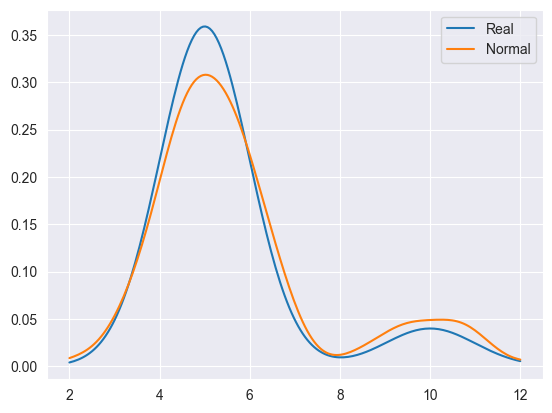

In [96]:
task_1_plot(h=0.5)

In [74]:
def task_1_size(h=1):
    N=np.linspace(200,2000,10)
    xs=np.linspace(2,12,500)
    errors=[]
    for n in N:
        X=gen_data(int(n))    
        kde=sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth=h).fit(X.reshape(-1,1))
        errors.append(np.mean((np.exp(kde.score_samples(xs.reshape(-1,1)))-real_dist(xs))**2))
    plt.plot(N,errors)

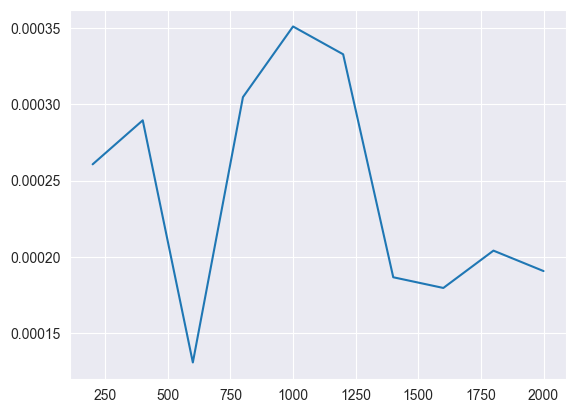

In [75]:
task_1_size(h=0.5)

In [83]:
def task_1_kernel_h(n=500):
    plts,ax=plt.subplots(1,3,figsize=(15,5))
    X=gen_data(n)
    xlin=np.linspace(2,12,500)
    real=real_dist(xlin)
    hs=[0.1,0.5,1]
    m1s=[]
    m2s=[]
    m3s=[]
    sigma=np.max([np.std(X),np.subtract(*np.percentile(X, [75, 25]))/1.34])
    H=np.pow(4/3/n,0.2)*sigma
    hs.append(H)
    hs.sort()
    for h in hs:
        m1=sklearn.neighbors.KernelDensity(kernel='gaussian', bandwidth=h).fit(X.reshape(-1,1))
        m2=sklearn.neighbors.KernelDensity(kernel='linear', bandwidth=h).fit(X.reshape(-1,1))
        m3=sklearn.neighbors.KernelDensity(kernel='tophat', bandwidth=h).fit(X.reshape(-1,1))
        m1s.append(np.mean((np.exp(m1.score_samples(xlin.reshape(-1,1)))-real)**2))
        m2s.append(np.mean((np.exp(m2.score_samples(xlin.reshape(-1,1)))-real)**2))
        m3s.append(np.mean((np.exp(m3.score_samples(xlin.reshape(-1,1)))-real)**2))
    ax[0].plot(hs,m1s,label='gaussian')
    ax[1].plot(hs,m2s,label='linear')
    ax[2].plot(hs,m3s,label='tophat')
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    ax[0].scatter([H],[np.min(m1s)],color='red')
    ax[1].scatter([H],[np.min(m2s)],color='red')
    ax[2].scatter([H],[np.min(m3s)],color='red')
    plt.show()
        

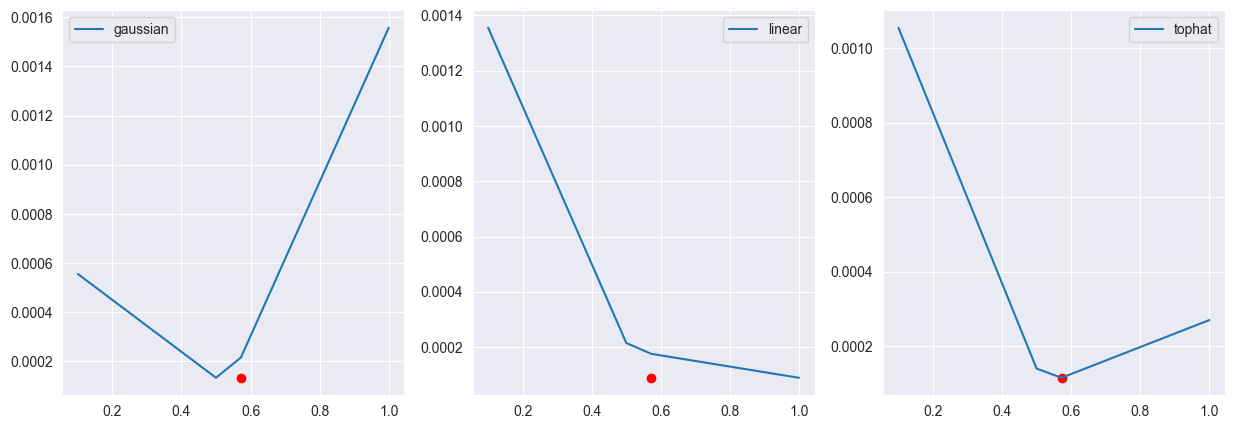

In [84]:
task_1_kernel_h()

np.float64(0.0)